# Analyse exploratoire

In [1]:
# Importation des modules et librairies
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency as chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
pd.set_option('display.max_columns', 33);
pd.set_option('display.max_rows', 100);
pd.options.display.max_rows = 999

In [3]:
df = pd.read_csv('df_fin.csv',index_col=[0])

In [4]:
df.head()

,code,categories_fr,labels_fr,countries_fr,allergens,traces_fr,nutrition_grade_fr,nbr_add,states_fr,main_category_fr,nutrition-score-fr_100g,product_name,generic_name,quantity,additives_n,additives,additives_tags,packaging_tags,categories_tags,pnns_groups_1,pnns_groups_2,formule,energy_100g,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,alcohol_100g,polyols_100g,acide_org,imputation
220374,3271330062939,"Boissons,Boissons gazeuses,Eaux,Eaux minérales...",NaN,France,NaN,Aucunes,a,3,"A vérifier,Complet,Informations nutritionnelle...",Eaux,0,Sémillante arômes naturels Citron,eau gazeuse,"0,5l",3,[ eau-de-la-source-semillante -> fr:eau-de-la...,3,bouteille,"beverages,carbonated drinks,waters,mineral wat...",beverages,sweetened beverages,61.83,36.0,0.0,2.1,0.0,0.0,0.0,0.0,2.01,4.0
180946,20656935,"Boissons,Boissons gazeuses,Eaux,Eaux minérales...","Peu ou pas de sucre,Sans sucre",France,NaN,NaN,a,0,"A vérifier,Complet,Informations nutritionnelle...",Eaux,0,Pétillante saveur Citron,NaN,1 l,0,[ eau-minerale-naturelle-gazeifiee -> fr:eau-...,1,"bouteille,plastique","beverages,carbonated drinks,waters,mineral wat...",beverages,non sugared beverages,26.13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,1.0
60623,49283802185,"Boissons,Boissons gazeuses,Eaux,Eaux minérales...",NaN,"France,États-Unis",NaN,NaN,a,0,"A vérifier,Complet,Informations nutritionnelle...",Eaux,0,S.Pellegrino,Sparkling Natural Mineral Water,25.3 fl. oz (1 pt 9.3 fl. oz) 750 mL,0,[ natural-mineral-water-with-natural-co2-adde...,1,plastic-bottle,"beverages,carbonated drinks,waters,mineral wat...",beverages,non sugared beverages,26.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.0
245394,3596710307562,Boissons-au-soja,"Bio,Bio européen,FR-BIO-01,Point Vert,AB Agric...",France,NaN,NaN,a,2,"A vérifier,Complet,Informations nutritionnelle...",Boissons-au-soja,-1,Boisson au soja saveur chocolat,"Boisson à base de soja saveur chocolat, issue ...",1 L,2,[ jus-de-soja-90 -> fr:jus-de-soja-90 ] [ j...,2,"brique,uht",boissons au soja,beverages,artificially sweetened beverages,319.50,320.0,2.1,10.1,0.9,3.7,0.0,0.0,0.00,-1.0
213055,3257983877687,"Boissons,Boissons gazeuses,Eaux,Eaux minérales...",NaN,France,NaN,NaN,a,0,"A vérifier,Complet,Informations nutritionnelle...",Eaux,0,Eau pétillante aromatisée Citron citron vert,NaN,1 l,0,[ eau-minerale-gazeifiee-99 -> fr:eau-mineral...,1,"bouteille,plastique","beverages,carbonated drinks,waters,mineral wat...",beverages,non sugared beverages,26.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.0


In [5]:
df['additives_n'].max()

31

In [6]:
df.loc[df['nbr_add']==31]['additives']

184347     [ ingredients -> fr:ingredients  ]  [ sirops-...
184346     [ ingredients -> fr:ingredients  ]  [ sirops-...
184345     [ ingredients -> fr:ingredients  ]  [ sirops-...
Name: additives, dtype: object

# Profils des produits par groupes Pnns_1

In [7]:
# Je divise mon df
df_clean = df[['pnns_groups_1', 'pnns_groups_2','formule','energy_100g','fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'alcohol_100g', 'polyols_100g','acide_org']];

In [8]:
df.columns

Index(['code', 'categories_fr', 'labels_fr', 'countries_fr', 'allergens',
       'traces_fr', 'nutrition_grade_fr', 'nbr_add', 'states_fr',
       'main_category_fr', 'nutrition-score-fr_100g', 'product_name',
       'generic_name', 'quantity', 'additives_n', 'additives',
       'additives_tags', 'packaging_tags', 'categories_tags', 'pnns_groups_1',
       'pnns_groups_2', 'formule', 'energy_100g', 'fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'alcohol_100g',
       'polyols_100g', 'acide_org', 'imputation'],
      dtype='object')

In [9]:
# J'enregistre mes colonnes catégorielles
df_clean_categ = df[['code', 'product_name','allergens',
       'nutrition_grade_fr', 'additives', 'nbr_add', 'additives_tags',
       'nutrition-score-fr_100g',  'additives_n']]

In [10]:
df_clean['pnns_groups_1'].unique()

array(['beverages', 'fruits and vegetables', 'cereals and potatoes',
       'fish meat eggs', 'fat and sauces', 'composite foods',
       'milk and dairy products', 'sugary snacks', 'salty snacks'],
      dtype=object)

In [11]:
df_clean.groupby('pnns_groups_1').agg(['min', 'max']).round(2)


pnns_groups_2                            \
                                          min                       max   
pnns_groups_1                                                             
beverages                 alcoholic beverages       sweetened beverages   
cereals and potatoes                    bread                  potatoes   
composite foods                one dish meals                  sandwich   
fat and sauces           dressings and sauces                      fats   
fish meat eggs                           eggs              tripe dishes   
fruits and vegetables            dried fruits                vegetables   
milk and dairy products                cheese           milk and yogurt   
salty snacks                       appetizers  salty and fatty products   
sugary snacks              biscuits and cakes                    sweets   

                        formule          energy_100g         fat_100g         \
                            min      max         min     max      min    max   
pnns_groups_1                                                                  
beverages                  0.00  2610.50        0.00  2415.0      0.0   43.9   
cereals and potatoes      80.32  3200.92       59.70  3770.0      0.0   72.0   
composite foods           53.30  3019.30       41.00  3017.0      0.0   70.0   
fat and sauces             0.00  3768.00        0.00  3772.0      0.0  100.0   
fish meat eggs            94.80  2992.00        1.85  2992.0      0.0   70.0   
fruits and vegetables     39.60  3137.29       11.00  3096.0      0.0   74.0   
milk and dairy products   52.40  3757.00        1.00  3757.0      0.0   99.8   
salty snacks              83.67  3157.44       30.00  3707.0      0.3   80.0   
sugary snacks              0.00  3250.40        0.00  3250.0      0.0   85.0   

                        carbohydrates_100g        fiber_100g         \
                                       min    max        min    max   
pnns_groups_1                                                         
beverages                              0.0   99.0        0.0  67.19   
cereals and potatoes                   0.0   92.0        0.0  57.60   
composite foods                        0.0   97.0        0.0  64.82   
fat and sauces                         0.0   96.0        0.0  99.22   
fish meat eggs                         0.0   65.0        0.0  83.30   
fruits and vegetables                  0.0   98.4        0.0  77.41   
milk and dairy products                0.0   96.0        0.0  76.24   
salty snacks                           0.0   88.0        0.0  49.48   
sugary snacks                          0.0  100.0        0.0  90.30   

                        proteins_100g       alcohol_100g       polyols_100g  \
                                  min   max          min   max          min   
pnns_groups_1                                                                 
beverages                         0.0  86.0          0.0  20.0          0.0   
cereals and potatoes              0.0  50.5          0.0   1.3          0.0   
composite foods                   0.0  44.0          0.0   3.0          0.0   
fat and sauces                    0.0  46.0          0.0  12.0          0.0   
fish meat eggs                    0.0  53.0          0.0   1.3          0.0   
fruits and vegetables             0.0  39.0          0.0   1.3          0.0   
milk and dairy products           0.0  49.0          0.0   3.0          0.0   
salty snacks                      0.0  58.8          0.0   1.3          0.0   
sugary snacks                     0.0  86.0          0.0  13.0          0.0   

                                acide_org        
                            max       min   max  
pnns_groups_1                                    
beverages                 96.00       0.0  2.01  
cereals and potatoes      34.03       0.0  0.54  
composite foods           34.03       0.0  1.35  
fat and sauces            15.00       0.0  2.02  
fish meat eggs    

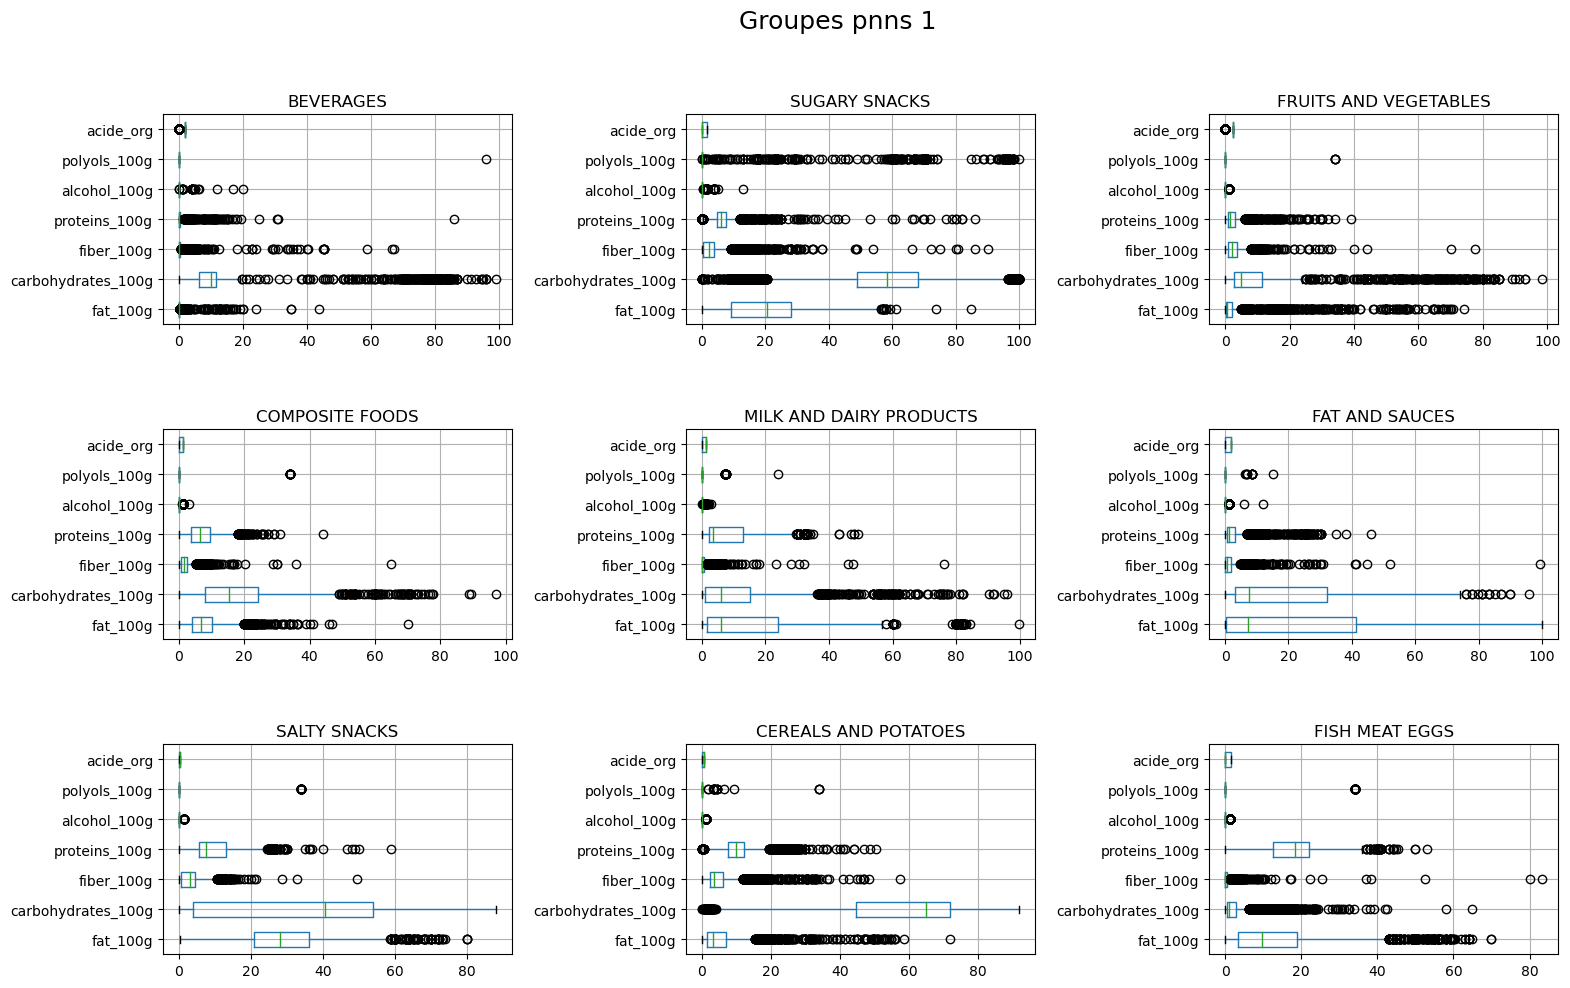

In [12]:
pnns_1 = ['beverages', 'sugary snacks', 'fruits and vegetables',
       'composite foods', 'milk and dairy products', 'fat and sauces',
       'salty snacks', 'cereals and potatoes', 'fish meat eggs']


plt.figure(figsize=(18, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Groupes pnns 1", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, pnns_1 in enumerate(pnns_1):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n + 1)

    # filter df and plot ticker on the new subplot axis
    df_clean[df_clean["pnns_groups_1"] == pnns_1][['fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g','alcohol_100g', 'polyols_100g', 'acide_org']].boxplot(ax=ax,vert=False,meanline=True)
    
    # chart formatting
    ax.set_title(pnns_1.upper())
    

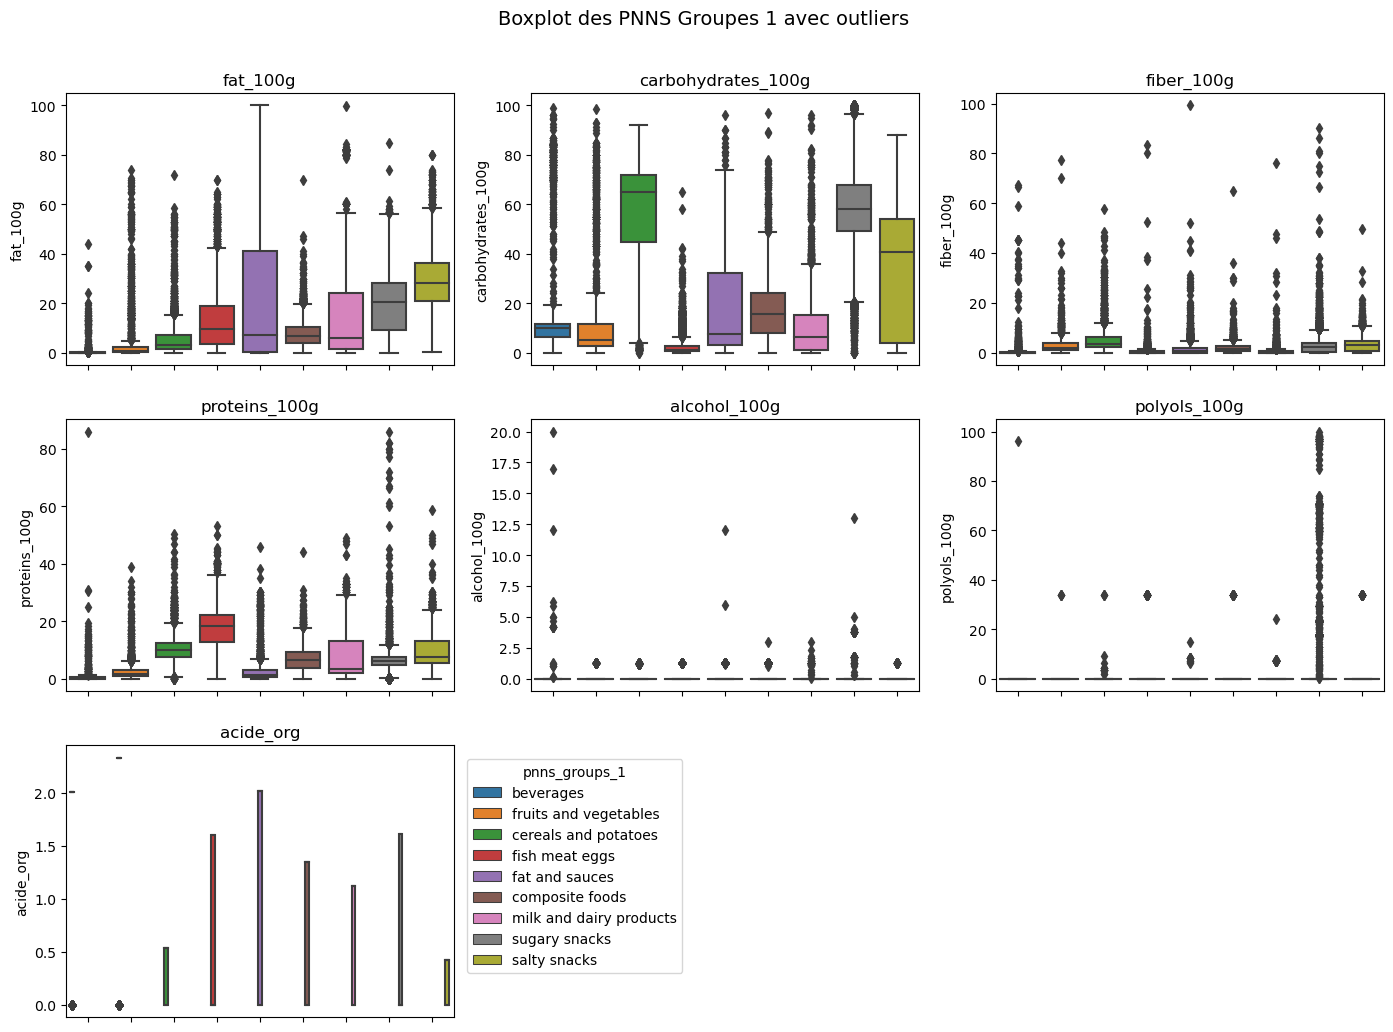

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(17, 12))
#fig.subplots_adjust(hspace=0.2)


fig.suptitle("Boxplot des PNNS Groupes 1 avec outliers", fontsize=14, y=0.95)

sns.boxplot(ax=axes[0, 0], data=df_clean, x='pnns_groups_1', y='fat_100g')
axes[0, 0].set(xticklabels=[]) 
axes[0, 0].set(xlabel=None)
axes[0, 0].set(title='fat_100g')

sns.boxplot(ax=axes[0, 1], data=df_clean, x='pnns_groups_1', y='carbohydrates_100g')
axes[0, 1].set(xticklabels=[]) 
axes[0, 1].set(xlabel=None)
axes[0, 1].set(title='carbohydrates_100g')

sns.boxplot(ax=axes[0, 2], data=df_clean, x='pnns_groups_1', y='fiber_100g')
axes[0, 2].set(xticklabels=[]) 
axes[0, 2].set(xlabel=None)
axes[0, 2].set(title='fiber_100g')

sns.boxplot(ax=axes[1,0], data=df_clean, x='pnns_groups_1', y='proteins_100g')
axes[1, 0].set(xticklabels=[]) 
axes[1,0].set(xlabel=None)
axes[1,0].set(title='proteins_100g')

sns.boxplot(ax=axes[1, 1], data=df_clean, x='pnns_groups_1', y='alcohol_100g')
axes[1, 1].set(xticklabels=[]) 
axes[1,1].set(xlabel=None)
axes[1, 1].set(title='alcohol_100g')

sns.boxplot(ax=axes[1,2], data=df_clean, x='pnns_groups_1', y='polyols_100g')

axes[1,2].set(xticklabels=[]) 
axes[1,2].set(xlabel=None)
axes[1,2].set(title='polyols_100g')

sns.boxplot(ax=axes[2,0], data=df_clean, x='pnns_groups_1', y='acide_org', hue='pnns_groups_1')
axes[2,0].set(xticklabels=[]) 
axes[2,0].set(xlabel=None)
axes[2,0].set(title='acide_org')
sns.move_legend(axes[2, 0],"upper left", bbox_to_anchor=(1, 1), borderaxespad=1)

fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.show()

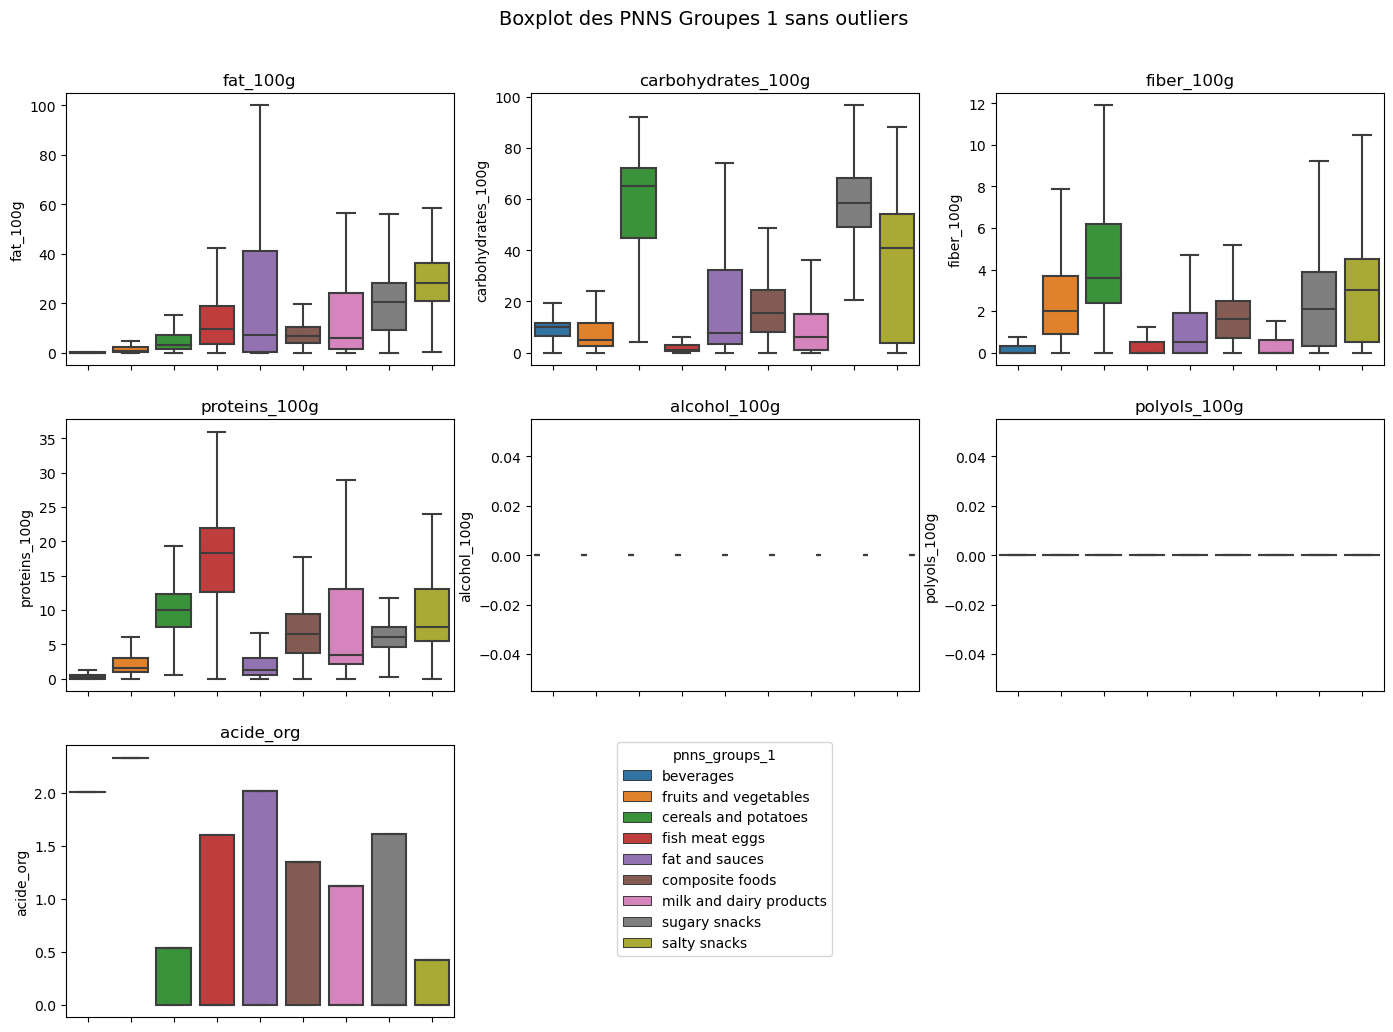

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(17, 12))
#fig.subplots_adjust(hspace=0.2)


fig.suptitle("Boxplot des PNNS Groupes 1 sans outliers", fontsize=14, y=0.95)

sns.boxplot(ax=axes[0, 0], data=df_clean, x='pnns_groups_1', y='fat_100g', showfliers=False)
axes[0, 0].set(xticklabels=[]) 
axes[0, 0].set(xlabel=None)
axes[0, 0].set(title='fat_100g')

sns.boxplot(ax=axes[0, 1], data=df_clean, x='pnns_groups_1', y='carbohydrates_100g', showfliers=False)
axes[0, 1].set(xticklabels=[]) 
axes[0, 1].set(xlabel=None)
axes[0, 1].set(title='carbohydrates_100g')

sns.boxplot(ax=axes[0, 2], data=df_clean, x='pnns_groups_1', y='fiber_100g', showfliers=False)
axes[0, 2].set(xticklabels=[]) 
axes[0, 2].set(xlabel=None)
axes[0, 2].set(title='fiber_100g')

sns.boxplot(ax=axes[1,0], data=df_clean, x='pnns_groups_1', y='proteins_100g', showfliers=False)
axes[1, 0].set(xticklabels=[]) 
axes[1,0].set(xlabel=None)
axes[1,0].set(title='proteins_100g')

sns.boxplot(ax=axes[1, 1], data=df_clean, x='pnns_groups_1',hue='pnns_groups_1', y='alcohol_100g', showfliers=False)
axes[1, 1].set(xticklabels=[]) 
axes[1,1].set(xlabel=None)
axes[1, 1].set(title='alcohol_100g')
sns.move_legend(axes[1, 1], "lower center",bbox_to_anchor=(0.5, -1))

sns.boxplot(ax=axes[1,2], data=df_clean, x='pnns_groups_1', y='polyols_100g', showfliers=False)

axes[1,2].set(xticklabels=[]) 
axes[1,2].set(xlabel=None)
axes[1,2].set(title='polyols_100g')


sns.boxplot(ax=axes[2,0], data=df_clean, x='pnns_groups_1', y='acide_org', showfliers=False)
axes[2,0].set(xticklabels=[]) 
axes[2,0].set(xlabel=None)
axes[2,0].set(title='acide_org')

fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])


plt.show()

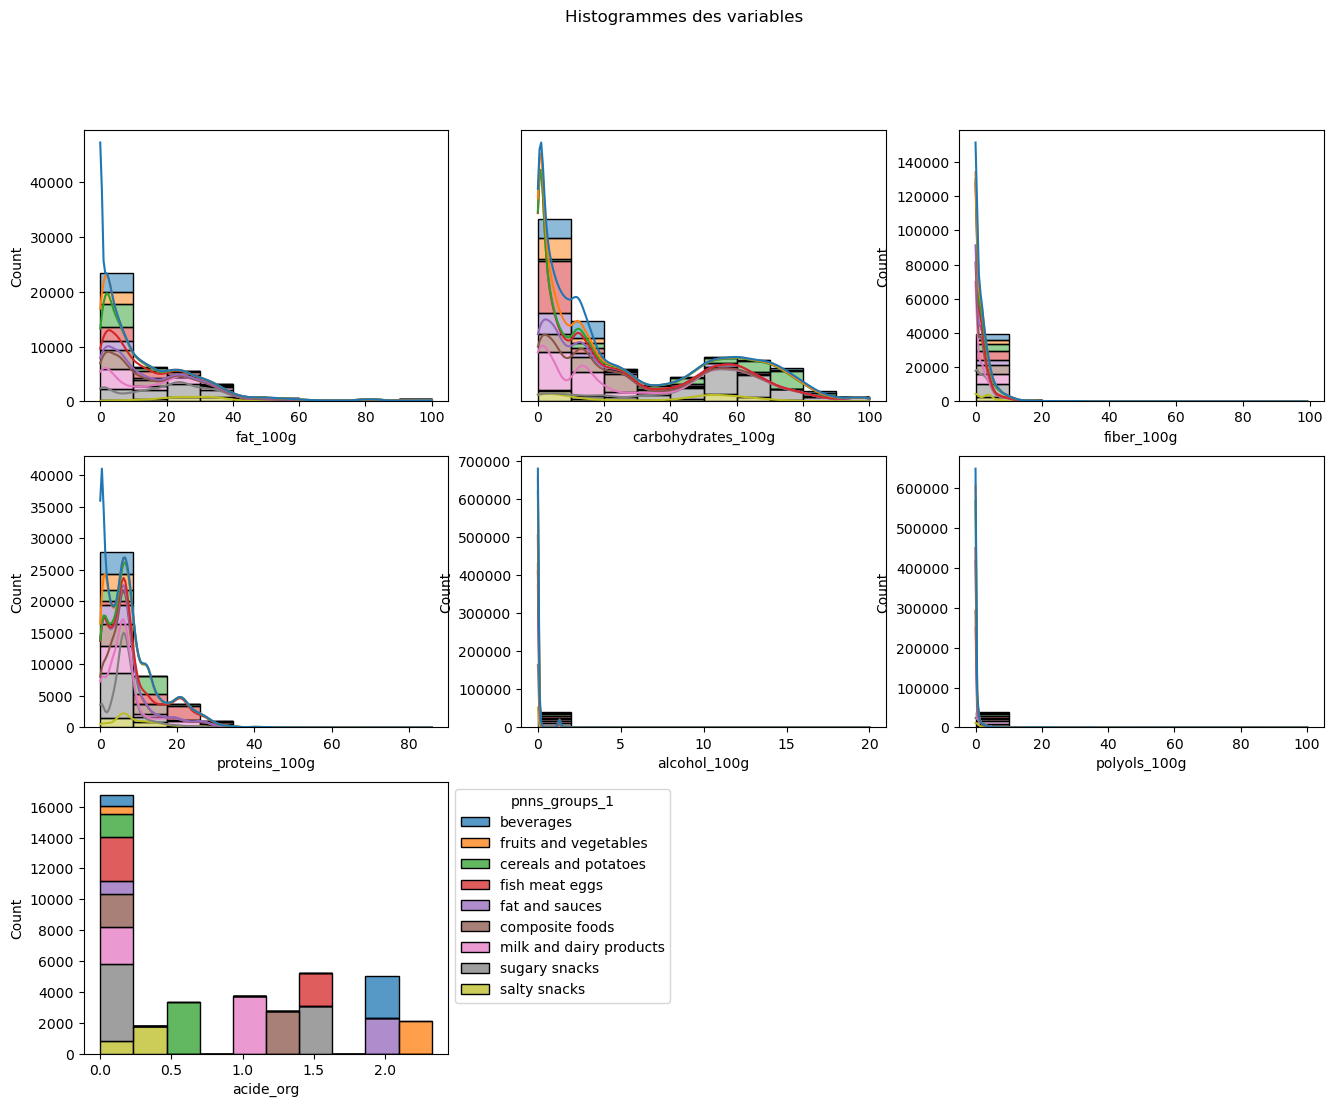

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

fig.suptitle('Histogrammes des variables')

sns.histplot(ax=axes[0, 0],data=df_clean, x='fat_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False, kde=True)

sns.histplot(ax=axes[0, 1],data=df_clean, x='carbohydrates_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False, kde=True)
axes[0, 1].get_yaxis().set_visible(False)

sns.histplot(ax=axes[0, 2],data=df_clean, x='fiber_100g',hue='pnns_groups_1', bins=10, multiple='stack', legend=False, kde=True)
sns.histplot(ax=axes[1, 0],data=df_clean, x='proteins_100g',hue='pnns_groups_1', bins=10, multiple='stack',legend=False, kde=True)


sns.histplot(ax=axes[1, 1],data=df_clean, x='alcohol_100g',hue='pnns_groups_1', bins=10, multiple='stack',legend=False, kde=True)
sns.histplot(ax=axes[1, 2],data=df_clean, x='polyols_100g',hue='pnns_groups_1', bins=10, multiple='stack',legend=False, kde=True)
sns.histplot(ax=axes[2, 0],data=df_clean, x='acide_org',hue='pnns_groups_1', bins=10, multiple='stack')
sns.move_legend(axes[2, 0], "best", bbox_to_anchor=(1, 1))


fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.show()

In [16]:
df = pd.concat([df_clean_categ,df_clean],axis=1)

# ACP

Je vais réaliser une analyse en composantes principales (ou ACP) qui est une technique de réduction de dimensions qui s'applique sur les variables quantitatives et qui a 2 objectifs :  
   * étudier la variabilités des individus (points communs et différences)
   * étudier les liaisons entre les variables

In [17]:
# J'encode ma colonne nutrition grade afin de l'utiliser dans mon ACP
le = preprocessing.LabelEncoder()

In [18]:
le.fit(df['nutrition_grade_fr'])

LabelEncoder()

In [19]:
df['label']= le.transform(df['nutrition_grade_fr'])

In [20]:
df_acp = df[['nutrition-score-fr_100g',
       'energy_100g', 'fat_100g', 'carbohydrates_100g','label',
       'fiber_100g', 'proteins_100g', 'alcohol_100g', 'additives_n']]

In [21]:
df_acp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40764 entries, 220374 to 256193
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nutrition-score-fr_100g  40764 non-null  int64  
 1   energy_100g              40764 non-null  float64
 2   fat_100g                 40764 non-null  float64
 3   carbohydrates_100g       40764 non-null  float64
 4   label                    40764 non-null  int32  
 5   fiber_100g               40764 non-null  float64
 6   proteins_100g            40764 non-null  float64
 7   alcohol_100g             40764 non-null  float64
 8   additives_n              40764 non-null  int64  
dtypes: float64(6), int32(1), int64(2)
memory usage: 3.0 MB


In [22]:
# préparation des données pour l'ACP

X= df_acp.values
names = df_acp.label
nom_variable = df_acp.columns

In [23]:
# Centrage et Réduction
# L’objectif est de rendre les variables comparables. Généralement, les variables sont normalisées de manière à 
#ce qu’elles aient au final un écart type égal à un et une moyenne égale à zéro.

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [24]:
# Calcul des composantes principales

pca = decomposition.PCA(n_components=9); #correspond aux 9 variables 
pca.fit(X_scaled)

PCA(n_components=9)

In [25]:
#Variance 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.cumsum())

[3.11505806 1.42808243 1.29703987 0.99790765 0.86995723 0.66956268
 0.56986344 0.04511963 0.0076298 ]
[0.34610907 0.504781   0.64889301 0.75976892 0.85642846 0.93082249
 0.9941391  0.99915227 1.        ]


In [26]:
# Je crée une df qui affiche la variance expliquée pour chaque dimension.
variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(9)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.115058,35.0,35.0
1,Dim2,1.428082,16.0,50.0
2,Dim3,1.297040,14.0,65.0
3,Dim4,0.997908,11.0,76.0
4,Dim5,0.869957,10.0,86.0
5,Dim6,0.669563,7.0,93.0
6,Dim7,0.569863,6.0,99.0
7,Dim8,0.045120,1.0,100.0
8,Dim9,0.007630,0.0,100.0


In [27]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

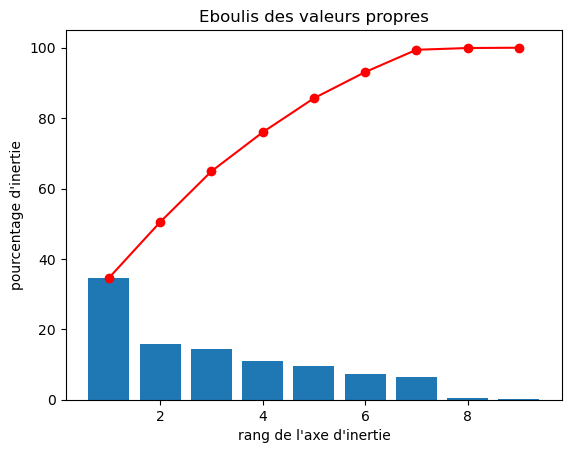

In [28]:
# Affichage d'un graphique qui décrit le pourcentage d’inertie totale associé à chaque axe.
display_scree_plot(pca)

In [29]:
# Calcul des composantes principales
n_comp = 3
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=3)

In [30]:
# Fonction qui me permet d'afficher mes cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

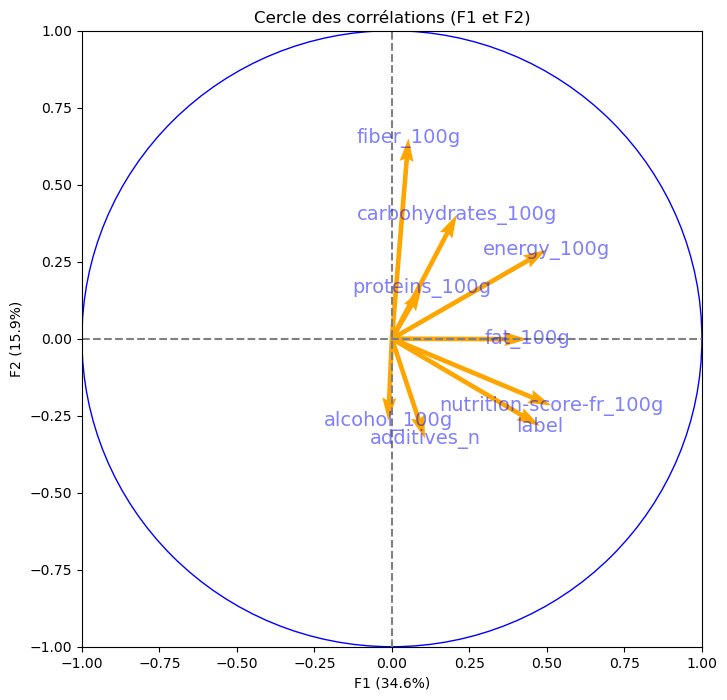

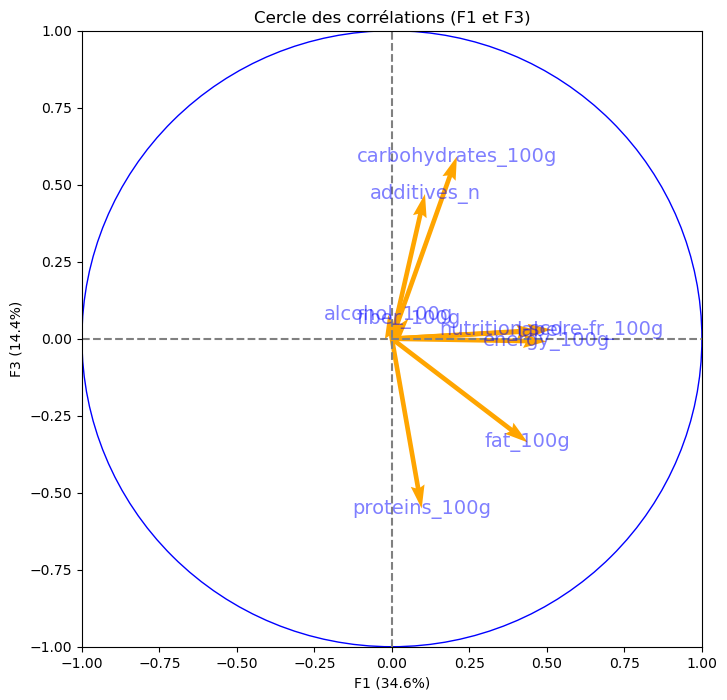

In [31]:
# Affichage de mes cercles de correlation
pcs = pca.components_
display_circles(pcs,n_comp , pca, [(0,1),(0,2),(0,3)], labels = np.array(nom_variable))

In [32]:
# Fonction qui permet de projeter les individus sur les dimensions 
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            
            plt.legend(['0','1','2','3','4'], title = "Nutriscore")

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

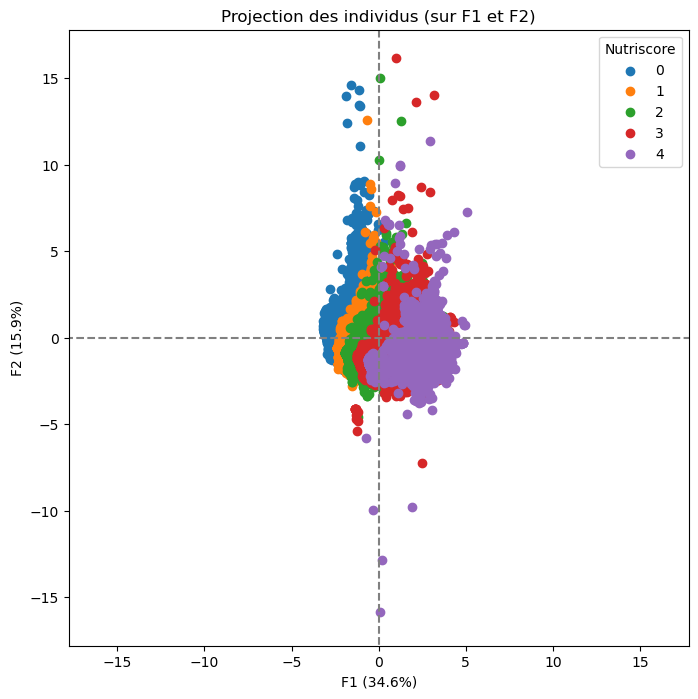

In [33]:
X_projected = pca.transform(X_scaled)

display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=names)
custom_palette = ["#499A53", "#74D834", "#FBF605", "#F49402", "#FF0000"] 
sns.set_palette(custom_palette) 
plt.show()

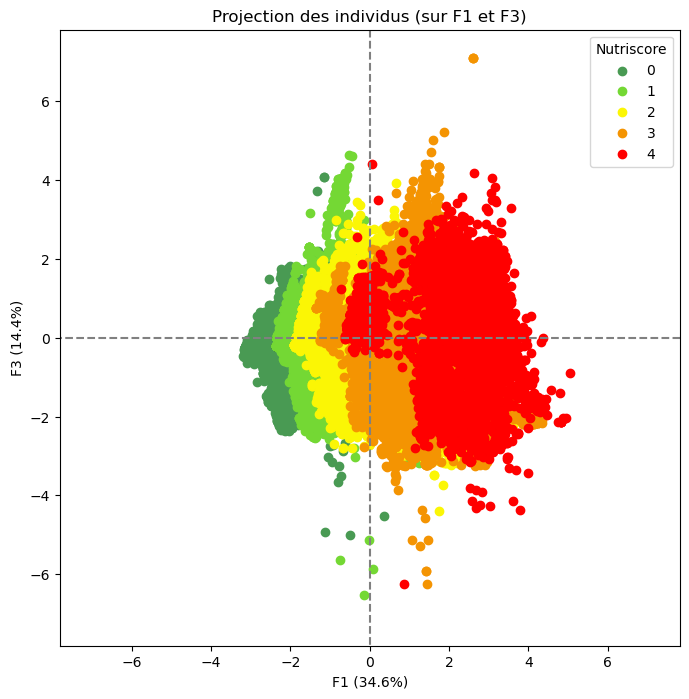

In [34]:
display_factorial_planes(X_projected, n_comp, pca, [(0,2)], illustrative_var=names)
custom_palette = ["#499A53", "#74D834", "#FBF605", "#F49402", "#FF0000"] 
sns.set_palette(custom_palette) 
plt.show()

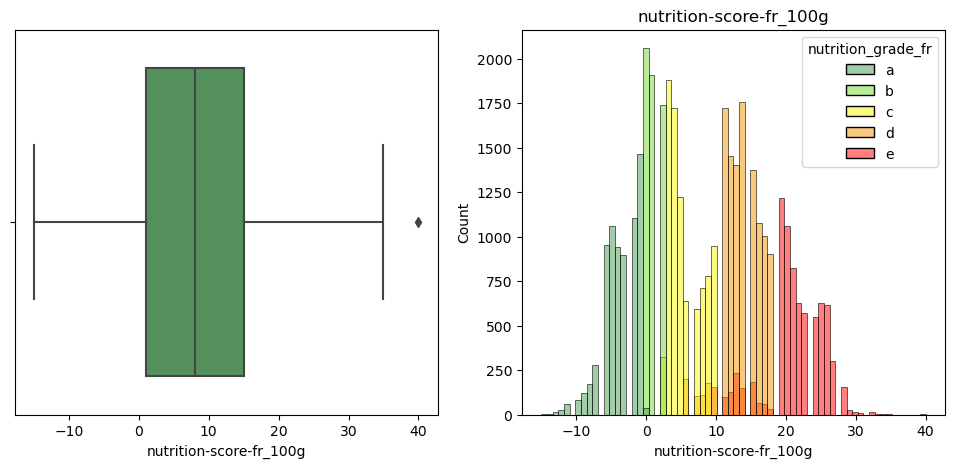

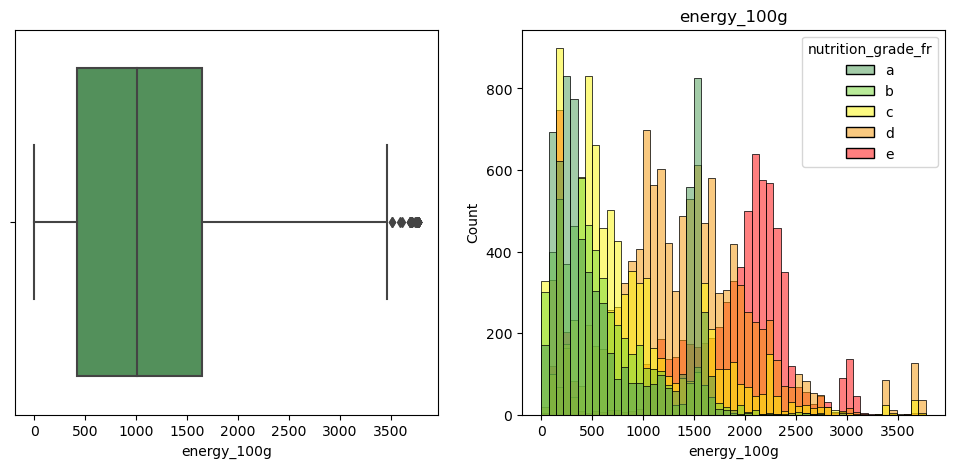

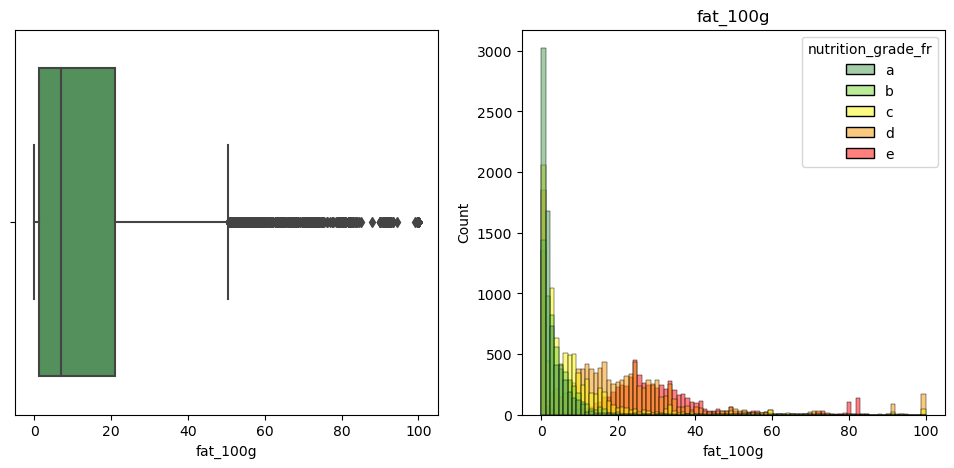

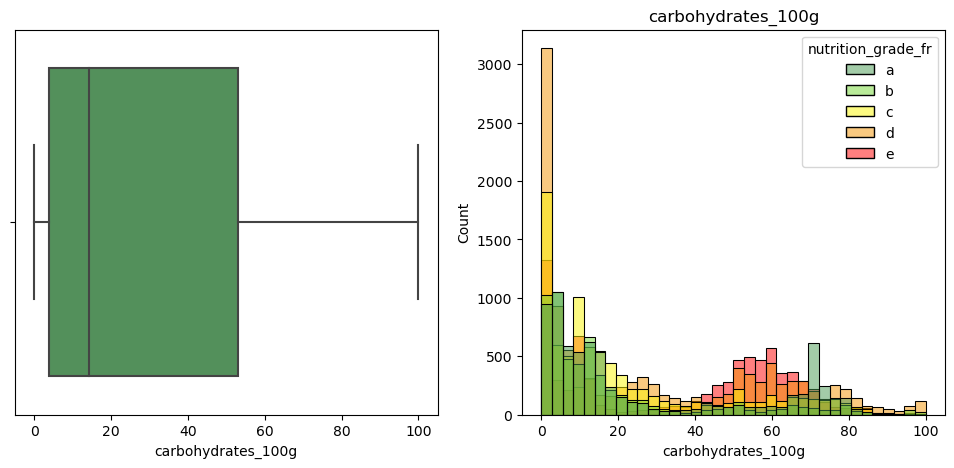

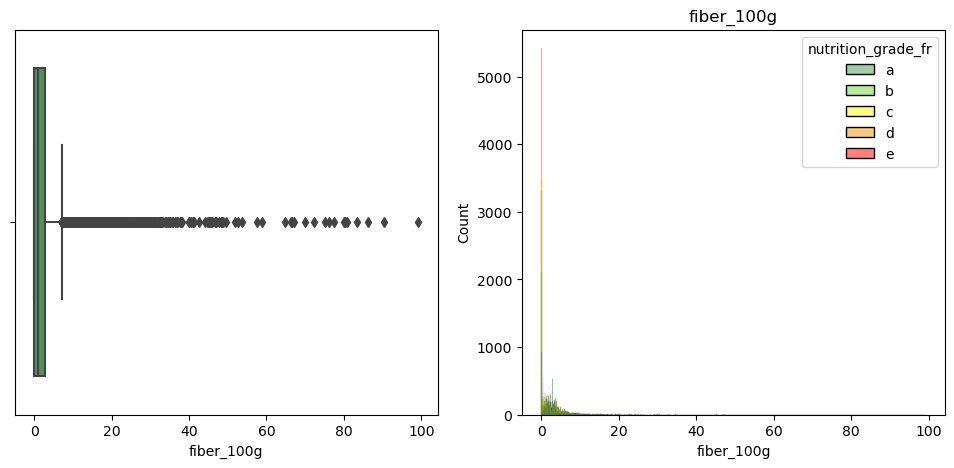

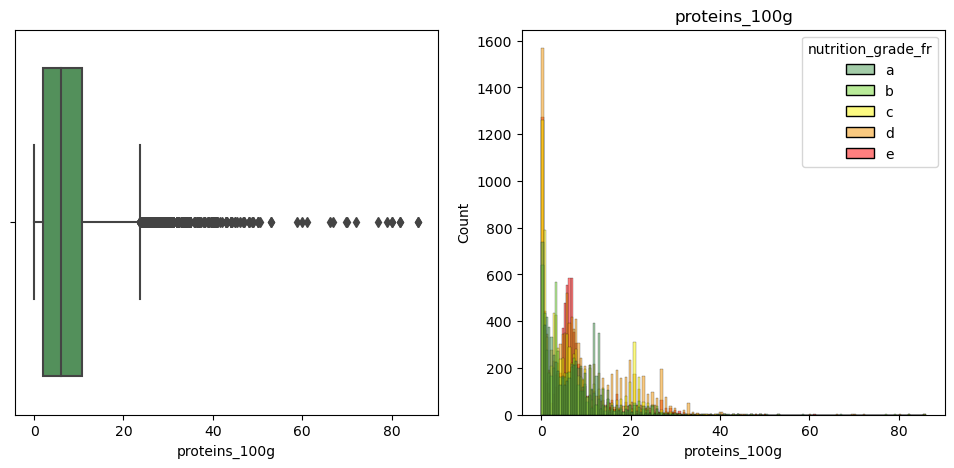

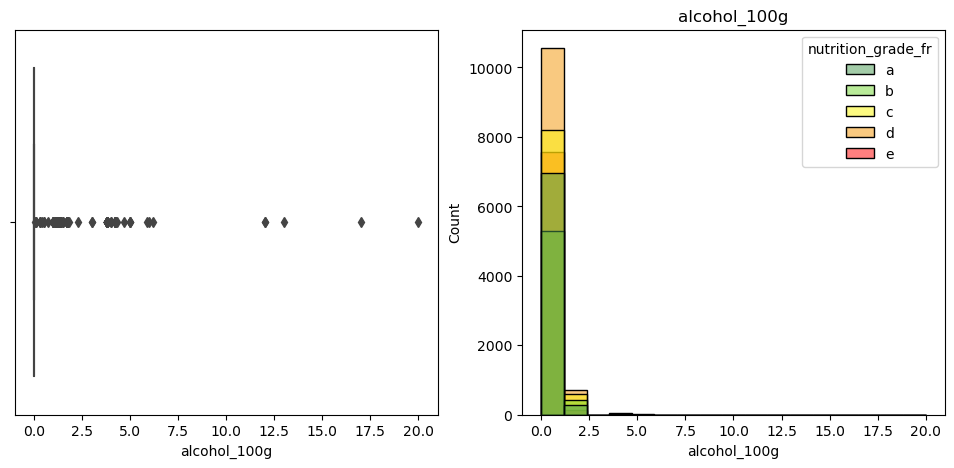

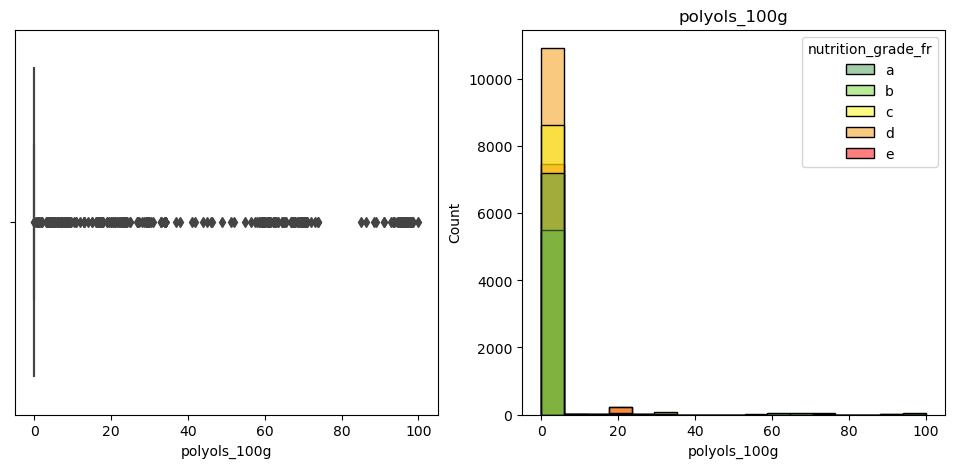

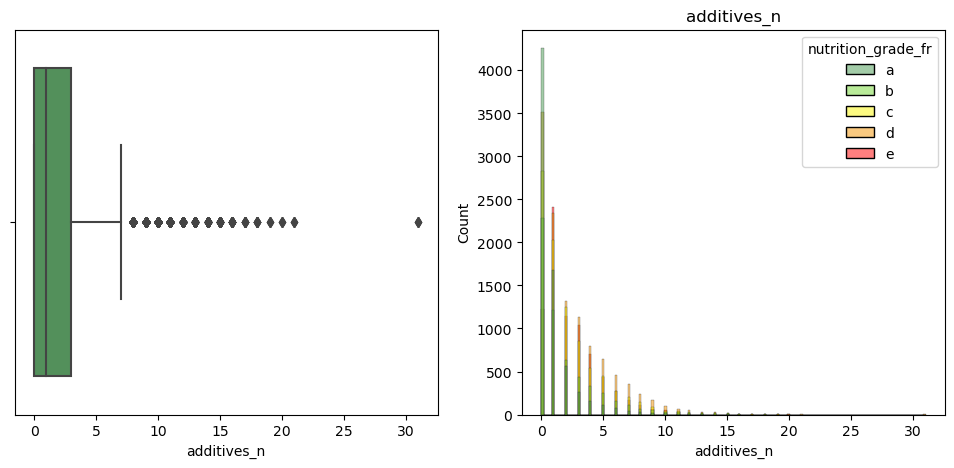

In [35]:
# Affichage via une boucle de mes variables représentés sous forme de boxplot et d'histogramme et regroupées
# en fonction de leur grade
liste_col = ['nutrition-score-fr_100g',
       'energy_100g', 'fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'alcohol_100g', 'polyols_100g',
       'additives_n']
for col in liste_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    
    title = col
    sns.histplot()
    sns.boxplot(ax=axes[0], x=df[col])
    plt.title(title)
    plt.xlabel(col)
    sns.histplot(data=df,x=df[col],hue=df['nutrition_grade_fr'],)
    plt.xlabel(col)
    plt.show()

In [36]:
df.columns

Index(['code', 'product_name', 'allergens', 'nutrition_grade_fr', 'additives',
       'nbr_add', 'additives_tags', 'nutrition-score-fr_100g', 'additives_n',
       'pnns_groups_1', 'pnns_groups_2', 'formule', 'energy_100g', 'fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'alcohol_100g',
       'polyols_100g', 'acide_org', 'label'],
      dtype='object')

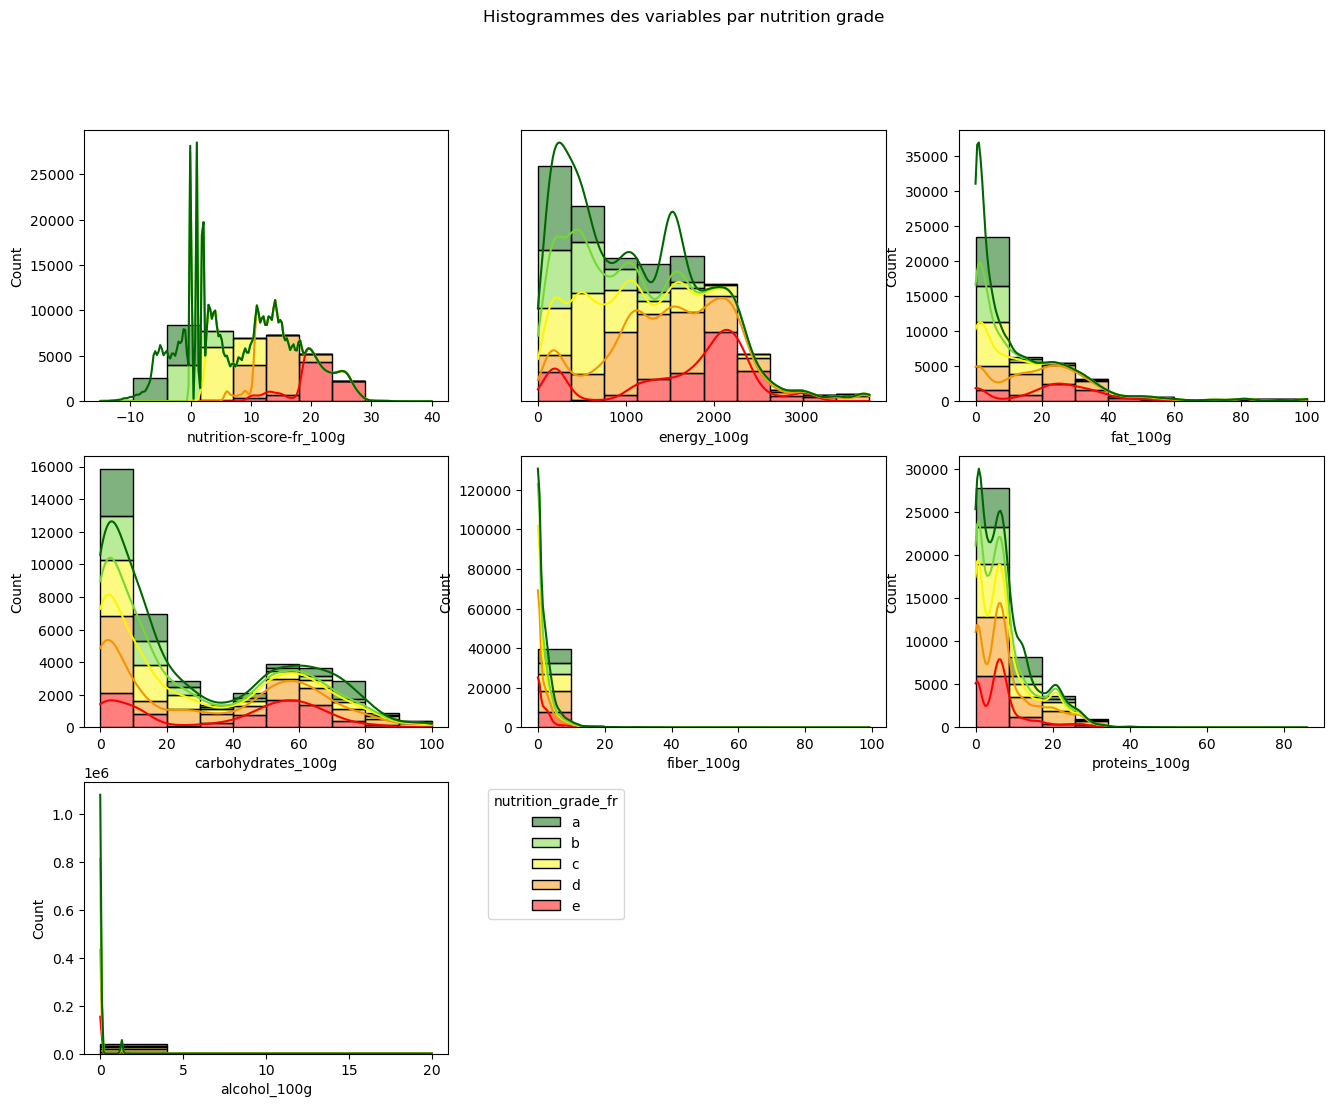

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

fig.suptitle('Histogrammes des variables par nutrition grade')

custom_palette = ["#006600", "#74D834", "#FBF605", "#F49402", "#FF0000"] 
sns.set_palette(custom_palette) 

sns.histplot(ax=axes[0, 0],data=df, x='nutrition-score-fr_100g',hue='nutrition_grade_fr', bins=10, multiple='stack', legend=False, kde=True)

sns.histplot(ax=axes[0, 1],data=df, x='energy_100g',hue='nutrition_grade_fr', bins=10, multiple='stack', legend=False, kde=True)
axes[0, 1].get_yaxis().set_visible(False)

sns.histplot(ax=axes[0, 2],data=df, x='fat_100g',hue='nutrition_grade_fr', bins=10, multiple='stack', legend=False, kde=True)
sns.histplot(ax=axes[1, 0],data=df, x='carbohydrates_100g',hue='nutrition_grade_fr', bins=10, multiple='stack', legend=False, kde=True)


sns.histplot(ax=axes[1, 1],data=df, x='fiber_100g',hue='nutrition_grade_fr', bins=10, multiple='stack', legend=False, kde=True)
sns.histplot(ax=axes[1, 2],data=df, x='proteins_100g',hue='nutrition_grade_fr', bins=10, multiple='stack', legend=False, kde=True)
sns.histplot(ax=axes[2, 0],data=df, x='alcohol_100g',hue='nutrition_grade_fr', bins=5, multiple='stack',  kde=True)
sns.move_legend(axes[2, 0], "best", bbox_to_anchor=(1.5, 1))


fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.show()

In [38]:
# Matrice de corrélation
df_corr = df[['nutrition-score-fr_100g',
       'formule', 'fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'alcohol_100g', 'polyols_100g',
       'acide_org', 'additives_n','label']].corr()

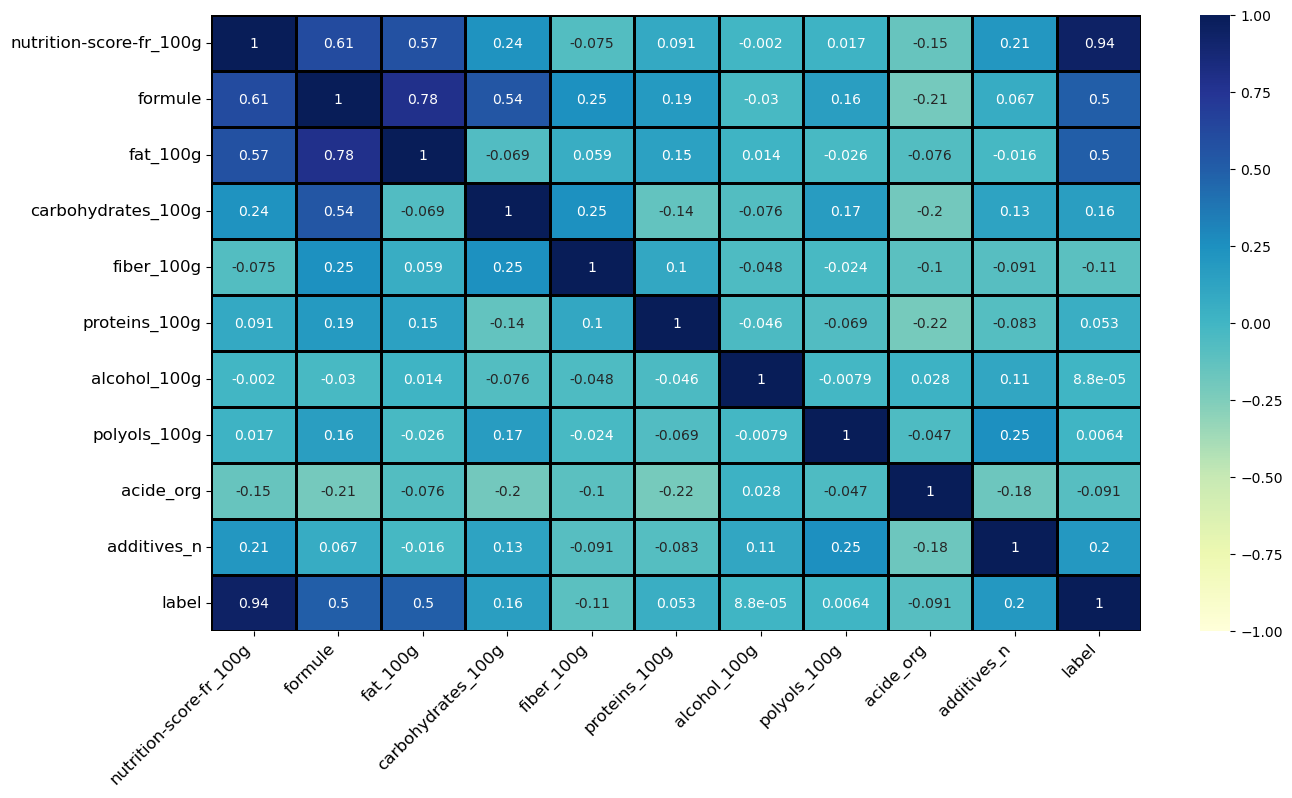

In [39]:
plt.figure(figsize=(15,8))

sns.heatmap(data=df_corr, annot=True,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1)
plt.yticks(rotation=0,fontsize = 12) 
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.show()

# Test de corrélation 

# Test du Chi² : nutri-grade et groupe pnns

# Pnns_1

In [40]:
# Ce test permet de tester la corrélation entre des variables qualitatives
# Création de ma table de contingence
X = "nutrition_grade_fr"
Y = "pnns_groups_1"

cont_1 = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1


pnns_groups_1,beverages,cereals and potatoes,composite foods,fat and sauces,fish meat eggs,fruits and vegetables,milk and dairy products,salty snacks,sugary snacks,Total
nutrition_grade_fr,,,,,,,,,,
a,43,2410,1418,139,535,1340,1171,61,106,7223
b,364,772,1301,204,848,650,1130,106,336,5711
c,1058,1057,1237,1007,1372,442,1237,691,713,8814
d,598,531,856,1515,1329,158,2066,1300,2932,11285
e,1390,60,85,324,924,45,501,420,3982,7731
Total,3453,4830,4897,3189,5008,2635,6105,2578,8069,40764


In [41]:
chi2, p, dof, exp = chi2_contingency(cont_1)

In [42]:
chi2, p

(19963.68468216723, 0.0)

Avec un p-value de 0.0, on peut dire que le nutri-grade est correlé aux groupes pnns_1

# Pnns_2

In [43]:
# Création de ma table de contingence
X = "nutrition_grade_fr"
Y = "pnns_groups_2"

cont_2 = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total", fill_value=0)
cont_2

pnns_groups_2,alcoholic beverages,appetizers,artificially sweetened beverages,biscuits and cakes,bread,breakfast cereals,cereals,cheese,chocolate products,dairy desserts,dressings and sauces,dried fruits,eggs,fats,fish and seafood,fruits,...,milk and yogurt,non sugared beverages,nuts,one dish meals,pastries,pizza pies and quiche,potatoes,processed meat,salty and fatty products,sandwich,soups,sweetened beverages,sweets,tripe dishes,vegetables,Total
nutrition_grade_fr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a,0,20,4,58,341,17,235,1,27,853,138,55,81,1,226,30,...,316,36,12,1353,14,17,1528,2,29,48,61,3,7,1,1194,7223
b,92,51,130,84,294,8,126,2,42,229,203,92,10,1,400,8,...,880,132,10,1103,35,98,320,33,45,100,356,10,175,17,194,5711
c,775,423,114,324,296,32,448,3,266,607,926,92,0,81,472,95,...,483,150,46,851,61,228,259,152,222,158,134,19,62,4,121,8814
d,233,717,117,1198,116,21,249,2,896,1664,1225,26,1,290,402,86,...,197,79,72,274,72,350,121,207,511,232,2,169,766,24,44,11285
e,284,244,264,1042,13,2,16,5,2497,423,311,9,0,13,14,3,...,42,202,7,38,236,28,23,333,169,19,3,640,207,0,30,7731
Total,1384,1455,629,2706,1060,80,1074,13,3728,3776,2803,274,92,386,1514,222,...,1918,599,147,3619,418,721,2251,727,976,557,556,841,1217,46,1583,40764


In [44]:
chi2, p, dof, exp = chi2_contingency(cont_2)

In [45]:
chi2, p

(33507.43281155442, 0.0)

Avec une p-value de 0.0 on peut dire que le nutrition-grade est corrélé aux groupes pnns_2

# Anova Nutrigrade et nombre d'additifs

In [46]:
df

,code,product_name,allergens,nutrition_grade_fr,additives,nbr_add,additives_tags,nutrition-score-fr_100g,additives_n,pnns_groups_1,pnns_groups_2,formule,energy_100g,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,alcohol_100g,polyols_100g,acide_org,label
220374,3271330062939,Sémillante arômes naturels Citron,NaN,a,[ eau-de-la-source-semillante -> fr:eau-de-la...,3,3,0,3,beverages,sweetened beverages,61.83,36.0,0.00,2.10,0.0000,0.00,0.0,0.000000,2.01,0
180946,20656935,Pétillante saveur Citron,NaN,a,[ eau-minerale-naturelle-gazeifiee -> fr:eau-...,0,1,0,0,beverages,non sugared beverages,26.13,1.0,0.00,0.00,0.0000,0.00,0.0,0.000000,2.01,0
60623,49283802185,S.Pellegrino,NaN,a,[ natural-mineral-water-with-natural-co2-adde...,0,1,0,0,beverages,non sugared beverages,26.13,0.0,0.00,0.00,0.0000,0.00,0.0,0.000000,2.01,0
245394,3596710307562,Boisson au soja saveur chocolat,NaN,a,[ jus-de-soja-90 -> fr:jus-de-soja-90 ] [ j...,2,2,-1,2,beverages,artificially sweetened beverages,319.50,320.0,2.10,10.10,0.9000,3.70,0.0,0.000000,0.00,0
213055,3257983877687,Eau pétillante aromatisée Citron citron vert,NaN,a,[ eau-minerale-gazeifiee-99 -> fr:eau-mineral...,0,1,0,0,beverages,non sugared beverages,26.13,0.0,0.00,0.00,0.0000,0.00,0.0,0.000000,2.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310371,8437000999119,Fouet Extra &quot;Le Catalan&quot;,NaN,e,[ maigre-et-gras-de-porc -> fr:maigre-et-gras...,5,5,25,5,fish meat eggs,meat,1878.10,1895.0,36.70,1.30,0.0000,29.30,0.0,0.000000,0.00,4
310299,8436550863888,Fuet Extra au Fromage Espagnol - Tradition Esp...,"LAIT, ferments lactiques, lactose, LAIT, LAIT,...",e,[ viande-de-porc -> fr:viande-de-porc ] [ v...,7,7,19,7,fish meat eggs,meat,970.70,971.0,15.13,3.29,0.0000,20.88,0.0,0.000000,0.00,4
310300,8436550864229,Salami Gourmet Poivre Moitié Sous vide,NaN,e,[ porc -> fr:porc ] [ sont-necessaires-125g...,6,6,23,6,fish meat eggs,meat,1698.38,1680.0,36.60,5.00,2.0100,14.30,0.0,0.000000,0.00,4
310302,8436550864281,Chorizo de Dinde - Tradition Espagnole,"LAIT, SOJA, LACTOSE",e,[ viande-et-gras-de-dinde -> fr:viande-et-gra...,10,10,19,10,fish meat eggs,meat,1311.04,971.0,15.13,3.29,0.0000,20.88,0.0,34.034016,0.00,4


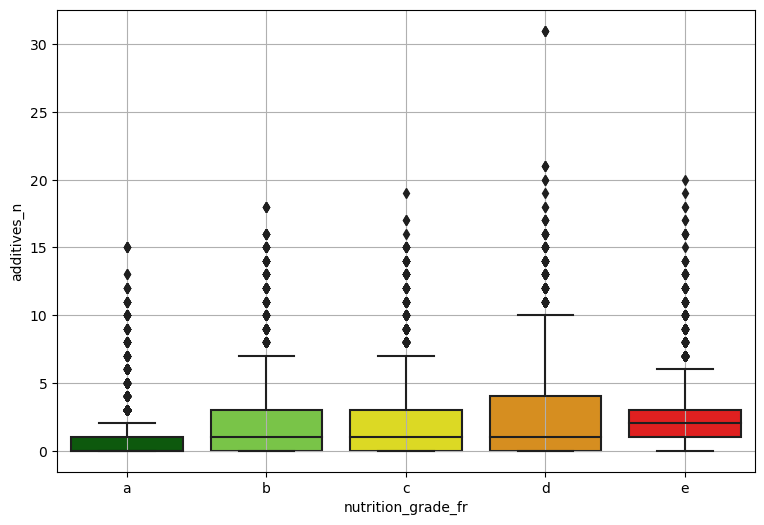

In [47]:
# Je vais faire une anova afin de voir si nutrition grade est corrélée avec nutrition score
# Ce test permet de tester la corrélation entre des variables qualitatives et quantitatives
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='nutrition_grade_fr',y='additives_n',data=df, showfliers=True)

custom_palette = ["#499A53", "#74D834", "#FBF605", "#F49402", "#FF0000"] 
sns.set_palette(custom_palette) 
plt.grid()
plt.show()

df['additives_n'] = pd.to_numeric(df['additives_n'])

In [48]:
model = ols('additives_n~nutrition_grade_fr', data = df).fit()

In [49]:
table = sm.stats.anova_lm(model)

In [50]:
table

,df,sum_sq,mean_sq,F,PR(>F)
nutrition_grade_fr,4.0,12798.304600,3199.576150,515.276065,0.0
Residual,40759.0,253090.591755,6.209441,NaN,NaN


In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            additives_n   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     515.3
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:51:42   Log-Likelihood:                -95058.
No. Observations:               40764   AIC:                         1.901e+05
Df Residuals:                   40759   BIC:                         1.902e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.8689      0.029     29.635      0.000       0.811       0.926
nutrition_grade_fr[T.b]     1.0761      0.044     24.389      0.000       0.990       1.163
nutrition_grade_fr[T.c]     1.2173      0.040     30.780      0.000       1.140       1.295
nutrition_grade_fr[T.d]     1.5578      0.038     41.487      0.000       1.484       1.631
nutrition_grade_fr[T.e]     1.5603      0.041     38.263      0.000       1.480       1.640
==============================================================================
Omnibus:                    17561.468   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95505.935
Skew:                           2.037   Prob(JB):                         0.00
Kurtosis:                       9.295   Cond. No.                         6.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Il y a aussi corrélation entre le nutrition grade et le nombre d'additifs.

# Test de corrélation : Additives_n et groupe pnns


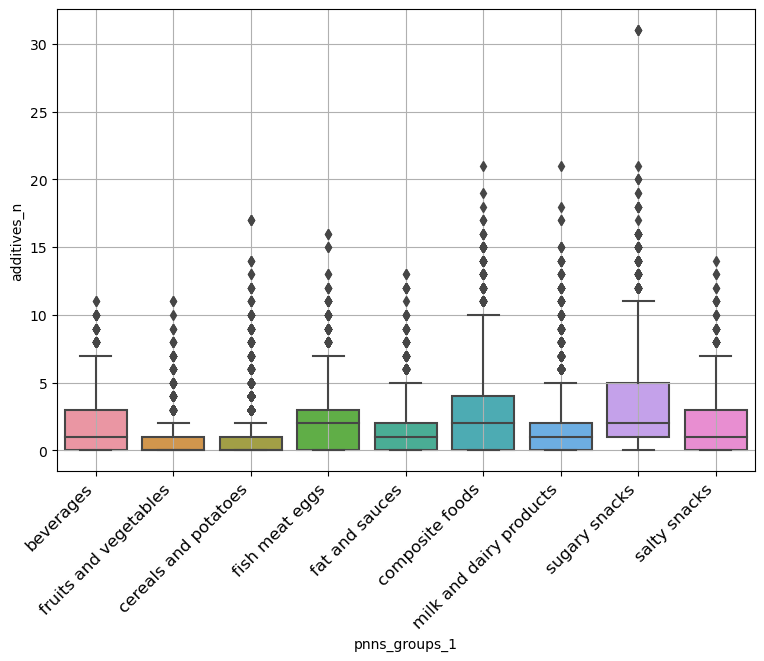

In [52]:
# Je vais faire une anova afin de voir si nutrition grade est corrélée avec nutrition score
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='pnns_groups_1',y='additives_n',data=df, showfliers=True)
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.grid()
plt.show()

In [53]:
model_1 = ols('additives_n~pnns_groups_1', data = df).fit()

In [54]:
table_1 = sm.stats.anova_lm(model_1)

In [55]:
table_1

,df,sum_sq,mean_sq,F,PR(>F)
pnns_groups_1,8.0,22688.712497,2836.089062,475.266128,0.0
Residual,40755.0,243200.183857,5.967370,NaN,NaN


In [56]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            additives_n   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     475.3
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:51:42   Log-Likelihood:                -94246.
No. Observations:               40764   AIC:                         1.885e+05
Df Residuals:                   40755   BIC:                         1.886e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    1.6406      0.042     39.465      0.000       1.559       1.722
pnns_groups_1[T.cereals and potatoes]       -0.4971      0.054     -9.132      0.000      -0.604      -0.390
pnns_groups_1[T.composite foods]             1.1248      0.054     20.720      0.000       1.018       1.231
pnns_groups_1[T.fat and sauces]             -0.0169      0.060     -0.282      0.778      -0.134       0.101
pnns_groups_1[T.fish meat eggs]              0.3037      0.054      5.620      0.000       0.198       0.410
pnns_groups_1[T.fruits and vegetables]      -0.8137      0.063    -12.877      0.000      -0.938      -0.690
pnns_groups_1[T.milk and dairy products]     0.0243      0.052      0.466      0.641      -0.078       0.126
pnns_groups_1[T.salty snacks]                0.0852      0.064      1.339      0.180      -0.039       0.210
pnns_groups_1[T.sugary snacks]               1.5196      0.050     30.591      0.000       1.422       1.617
==============================================================================
Omnibus:                    16720.073   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85192.132
Skew:                           1.948   Prob(JB):                         0.00
Kurtosis:                       8.915   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Il y a corrélation entre le nutrition grade et le groupe pnns_1 excepté (**fat and sauce et milk and dairy products**)

# Additif_n et nutrition_score_100g

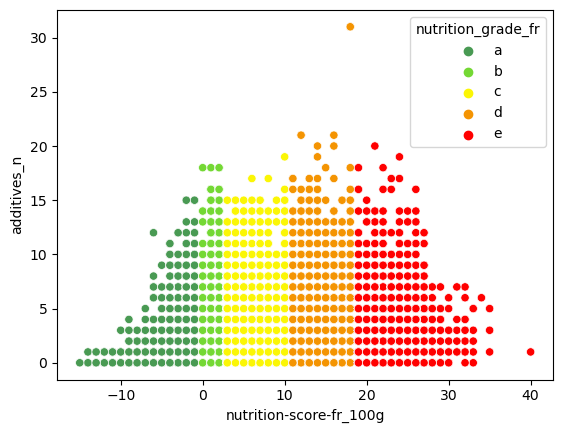

In [57]:
ax = sns.scatterplot(data=df, x='nutrition-score-fr_100g',y='additives_n',hue=df['nutrition_grade_fr'])
custom_palette = ["#499A53", "#74D834", "#FBF605", "#F49402", "#FF0000"] 
sns.set_palette(custom_palette) 


In [58]:
from scipy import stats
from scipy.stats import spearmanr

In [59]:
# test de corrélation entre variables quantitatives
stats.spearmanr(df['nutrition-score-fr_100g'],df['additives_n'])

SpearmanrResult(correlation=0.27951566182208093, pvalue=0.0)

Il y a corrélation entre le nutrition_score et le nombre d'additifs.

# Nutrition-score-fr_100g et groupe pnns_1

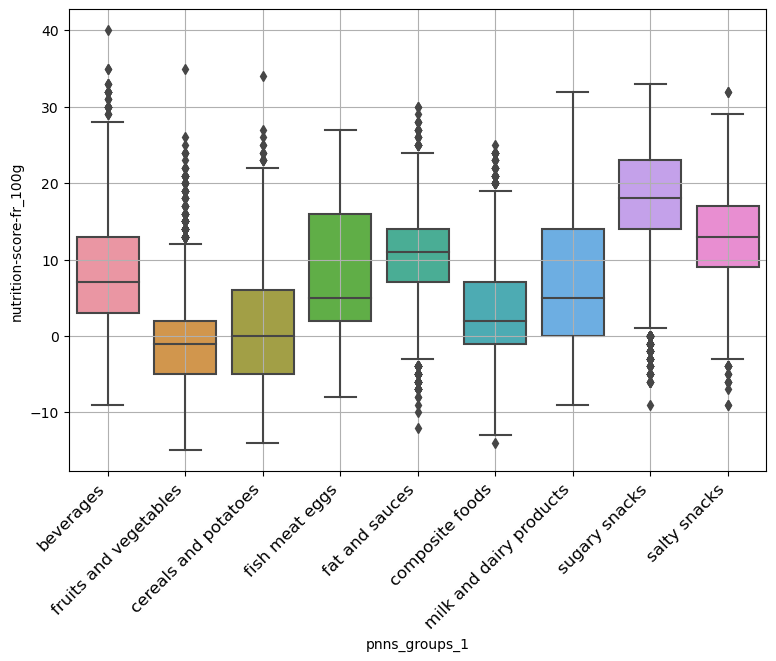

In [60]:
# Je vais faire une anova afin de voir si nutrition grade est corrélée avec nutrition score
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='pnns_groups_1',y='nutrition-score-fr_100g',data=df, showfliers=True)
plt.xticks(rotation=45,fontsize = 12,va="top", ha='right') 
plt.grid()
plt.show()

In [70]:
df.rename(columns={'nutrition-score-fr_100g' : 'nutrition_100g'},inplace=True);

In [71]:
df.columns

Index(['code', 'product_name', 'allergens', 'nutrition_grade_fr', 'additives',
       'nbr_add', 'additives_tags', 'nutrition_100g', 'additives_n',
       'pnns_groups_1', 'pnns_groups_2', 'formule', 'energy_100g', 'fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'alcohol_100g',
       'polyols_100g', 'acide_org', 'label'],
      dtype='object')

In [72]:
model_3 = ols('nutrition_100g~pnns_groups_1', data = df).fit()

In [73]:
table_3 = sm.stats.anova_lm(model_3)

In [74]:
table_3

,df,sum_sq,mean_sq,F,PR(>F)
pnns_groups_1,8.0,1.300643e+06,162580.387962,3246.640274,0.0
Residual,40755.0,2.040868e+06,50.076502,NaN,NaN


In [75]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         nutrition_100g   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     3247.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:54:54   Log-Likelihood:            -1.3760e+05
No. Observations:               40764   AIC:                         2.752e+05
Df Residuals:                   40755   BIC:                         2.753e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    8.4466      0.120     70.139      0.000       8.211       8.683
pnns_groups_1[T.cereals and potatoes]       -7.2536      0.158    -45.995      0.000      -7.563      -6.945
pnns_groups_1[T.composite foods]            -5.1368      0.157    -32.666      0.000      -5.445      -4.829
pnns_groups_1[T.fat and sauces]              2.0981      0.174     12.072      0.000       1.757       2.439
pnns_groups_1[T.fish meat eggs]              0.3214      0.157      2.053      0.040       0.015       0.628
pnns_groups_1[T.fruits and vegetables]      -8.7198      0.183    -47.637      0.000      -9.079      -8.361
pnns_groups_1[T.milk and dairy products]    -1.2867      0.151     -8.539      0.000      -1.582      -0.991
pnns_groups_1[T.salty snacks]                4.3389      0.184     23.556      0.000       3.978       4.700
pnns_groups_1[T.sugary snacks]               8.9320      0.144     62.069      0.000       8.650       9.214
==============================================================================
Omnibus:                      383.315   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.497
Skew:                           0.212   Prob(JB):                     7.87e-82
Kurtosis:                       2.799   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Il y a corrélation entre les groupes pnns_1 et le nutri_score.

# Test de corrélation Energy_100g et nutriscore_100g

Il s'agit de deux variables quantitatives mais non linéaires. J'utilise le test de Spearman.

In [76]:
df_energy = df[['energy_100g','nutrition_100g','nutrition_grade_fr']]

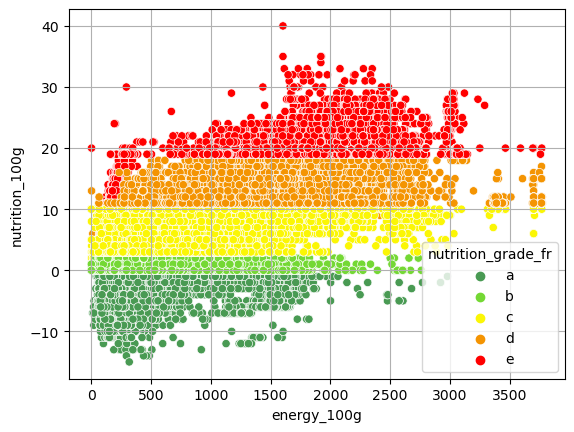

In [77]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df_energy, x="energy_100g", y="nutrition_100g", hue="nutrition_grade_fr")

plt.xlabel("energy_100g")
plt.ylabel("nutrition_100g")
plt.grid()

plt.show()

In [78]:
from scipy import stats
from scipy.stats import spearmanr

In [79]:
stats.spearmanr(df_energy['nutrition_100g'],df_energy['energy_100g'])

SpearmanrResult(correlation=0.6170923371778652, pvalue=0.0)

Il y a corrélation entre nutrition_score_100g et energy_100g.